# Progress Report #3.5: [Blog-Sentiment Analysis](https://github.com/Data-Science-for-Linguists-2019/Blog-Sentiment-Analysis)

*Eva fix the link below*

This is the second part of [Progress Report #3](https://github.com/Data-Science-for-Linguists-2019/Blog-Sentiment-Analysis). I am switching Jupyter notebooks so I can do some math stuff in R. Most of this code is stolen from my Statistics Research in Linguistics professor, Dr. Melinda Fricke, and our class textbook *How to do Linguistics with R* by Dr. Natalia Levshina. 

# Loading the data again

In [5]:
# If you are trying to reproduce this - the Anaconda version of R does not come with lme4 and car installed
# install.packages("package") wasn't working for me so I used Anaconda-Navigator to install
library(ggplot2)
library(lme4)
library(car)

Loading required package: carData


In [8]:
filename = '/users/eva/Documents/Data_Science/Blog-Sentiment-Analysis/blog_sentiment_data.csv'

In [9]:
blogdata <- read.csv(file=filename, header=TRUE, sep=",")

In [11]:
dim(blogdata)

[1] 681284     11

In [12]:
summary(blogdata)

       X                id             gender            age       
 Min.   :     0   Min.   :   5114   female:336091   Min.   :13.00  
 1st Qu.:170321   1st Qu.:1239610   male  :345193   1st Qu.:17.00  
 Median :340642   Median :2607577                   Median :24.00  
 Mean   :340642   Mean   :2397802                   Mean   :23.93  
 3rd Qu.:510962   3rd Qu.:3525660                   3rd Qu.:26.00  
 Max.   :681283   Max.   :4337650                   Max.   :48.00  
                                                                   
                 industry           sign                    date       
 indUnk              :251015   Cancer : 65048   02,August,2004: 16544  
 Student             :153903   Aries  : 64979   01,August,2004: 13261  
 Technology          : 42055   Taurus : 62561   03,August,2004: 11851  
 Arts                : 32449   Libra  : 62363   05,August,2004:  9297  
 Education           : 29633   Virgo  : 60399   04,August,2004:  8661  
 Communications-Media: 2

Looks like everything loaded in correctly. (Note: `head(blogdata)` looks like a mess.)

## Analysis questions
Now that I have the polarity scores, I would like to investigate potential correlations between polarity score and industry, age, or gender. I also want to see if it's possible to predict polarity score using demographic information (hypothesis: no, but I think it's worth investigating). I realize that since I'm not dropping duplicate blogs and finding the mean for that blogger, that effects my results, but I'm going to disregard that since I don't have a ton of time. I have 3 main aims for this analysis:

+ Reveal potential relationships in the data using tables and graphs
+ Investigate correlations
+ Create a mixed effects regression model in order to discover if any of the demographic info is a significant predictor for polarity

Full disclosure, I learned how to create a mixed effects regression model yesterday. Hopefully I'm doing everything correctly.

### Looking for relationships in the data

In [19]:
aggregate(polarity_score ~ industry, data=blogdata, mean)

industry,polarity_score
Accounting,0.4645508
Advertising,0.3727675
Agriculture,0.3754881
Architecture,0.3044571
Arts,0.3376918
Automotive,0.2363101
Banking,0.2816877
Biotech,0.3018659
BusinessServices,0.3540992
Chemicals,0.2320878


Polarity scores across industry don't seem to vary substantially.

In [14]:
aggregate(polarity_score ~ age, data=blogdata, mean)

age,polarity_score
13,0.2837880
14,0.3135089
15,0.3238808
16,0.3219215
17,0.3485861
23,0.3662989
24,0.3473385
25,0.3465799
26,0.3553429
27,0.3402514


These seem to vary more substantially - but that may be do to variance in data size. Looks like everything still falls within neutral.

In [16]:
aggregate(age ~ sentiment, data=blogdata, mean)

sentiment,age
negative,23.56961
neutral,24.26917
positive,23.87969


Neutral blogs have slightly older bloggers.

In [18]:
aggregate(polarity_score ~ gender, data=blogdata, mean)

gender,polarity_score
female,0.3664453
male,0.3173169


Female bloggers have slightly higher polarity scores, though both fall within the neutral range.

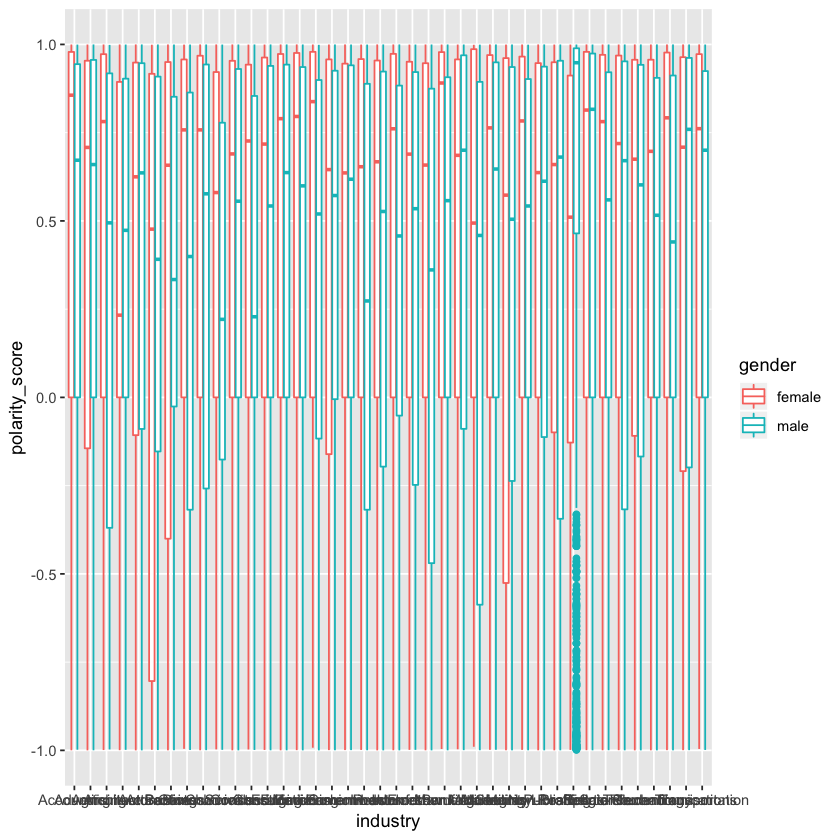

In [21]:
ggplot(blogdata, aes(industry, polarity_score, color=gender)) + geom_boxplot() 

For the purpose of data visualization, I'm going to create a subset with only the top 10 industries (excluding indUnk).

In [26]:
subset(blogdata, industry=='Student' | industry=='Technology' | industry=='Arts' | industry=='Education' 
       | industry=='Communications-Media' | industry=='Internet' | industry=='Non-Profit' 
       | industry=='Engineering' | industry=='Law' | industry=='Publishing') -> blogdata.subset

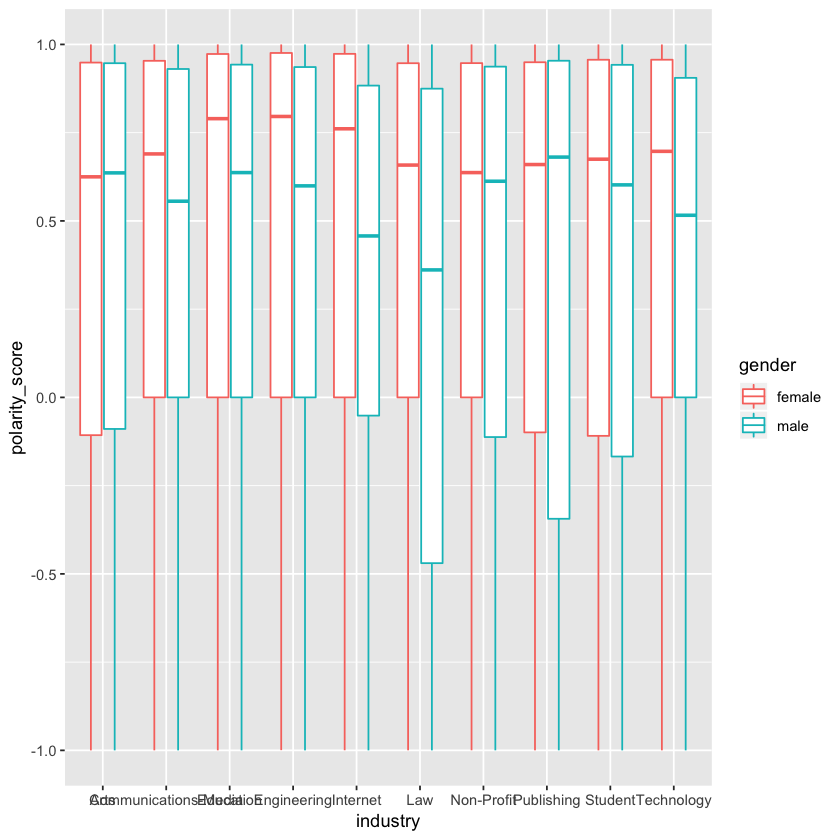

In [27]:
ggplot(blogdata.subset, aes(industry, polarity_score, color=gender)) + geom_boxplot() 

No obvious differences, except men who work in Law and Publishing seem to be more negative than women in those same fields.

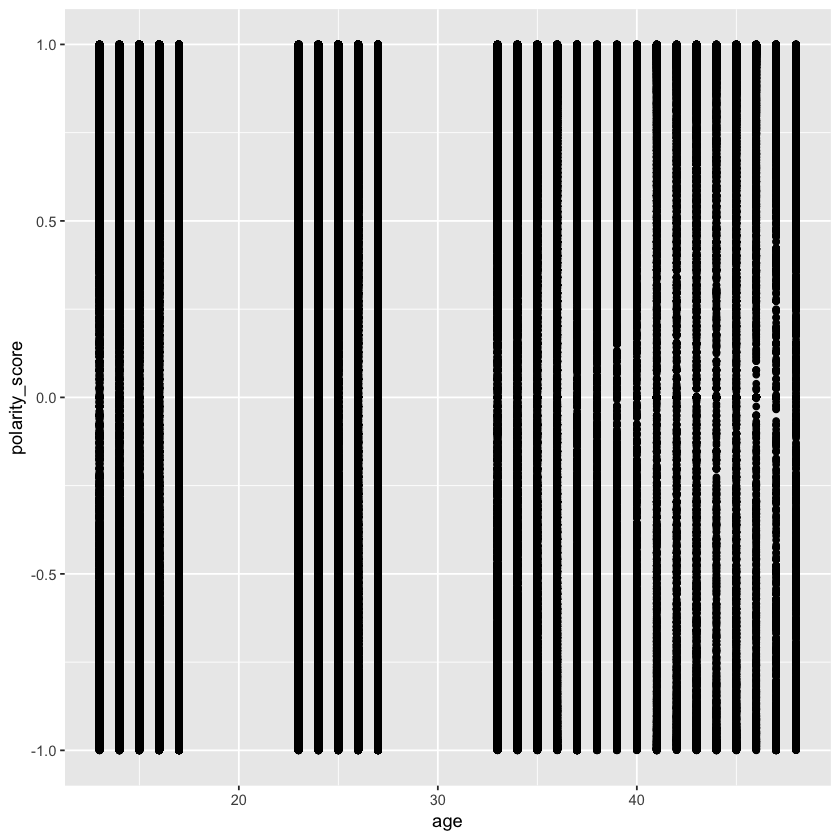

In [29]:
ggplot(blogdata, aes(age, polarity_score)) + geom_point()

Well, this is not helpful. Let's try correlations.

### Looking for relationships in the data
I'm going to look for correlations between age, industry, gender, and polarity score. 

In [31]:
# for some reason this one only worked in Jupyter notebook and not Anaconda-Navigator
install.packages("corrgram")

also installing the dependencies ‘modeltools’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘mvtnorm’, ‘trimcluster’, ‘gridExtra’, ‘bitops’, ‘fpc’, ‘viridis’, ‘gtools’, ‘gdata’, ‘caTools’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘seriation’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [32]:
library(corrgram)

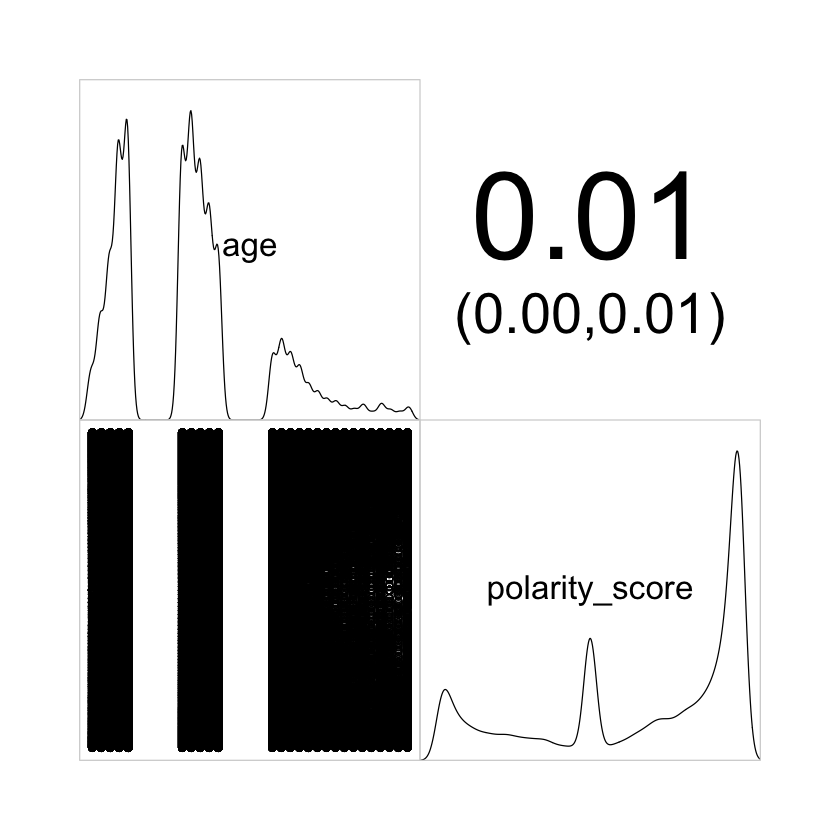

In [36]:
corrgram(blogdata[ , c("gender","age", "industry", "polarity_score")],
         lower.panel=panel.pts, upper.panel=panel.conf, diag.panel=panel.density ,cor.method="pearson")

The correlogram didn't generate correlations for the gender and industry, which is expected as they're categorical variables but... it has worked for categorical variables before. There is basically no correlation between polarity score and age. It might as well be random.

### Trying mixed effects regression
Now I'm going to build a model to see if any of the demographic information has any predictive power towards polarity score (again, I'm guessing no). Mixed effects regression is better than just doing an ANOVA because an ANOVA is for averaged data, and here we have many blogs per blogger. I think the data is supposed to be normally distributed.... but uh... I really don't know if there's a transformation that exists to fix this data. I think I am also not supposed to use predictor variables with >6 categories as a fixed effect. Let's just... try anyway.

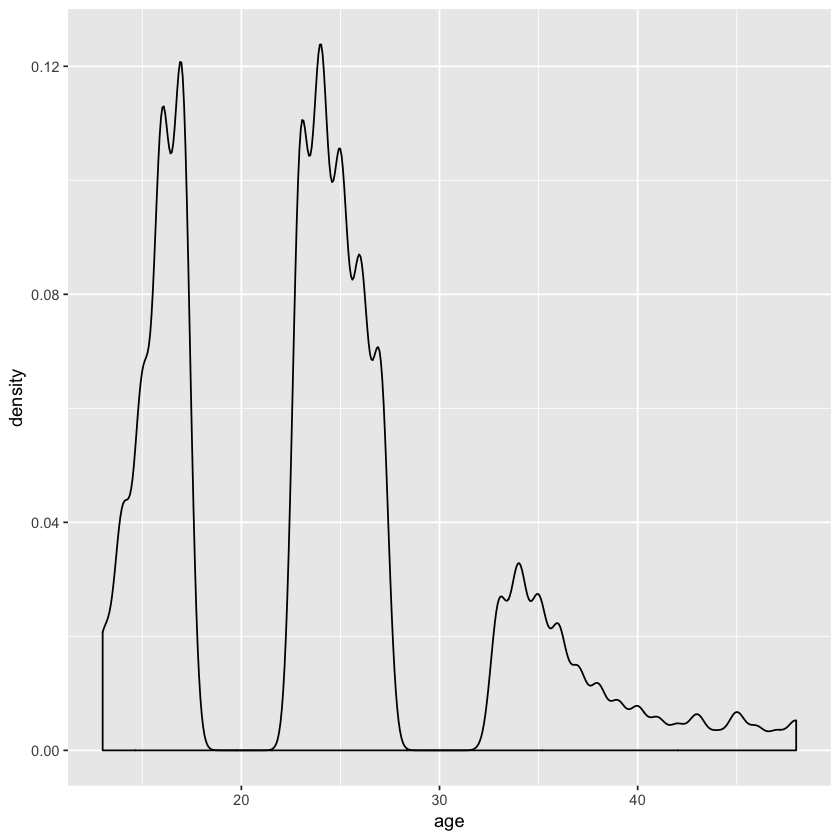

In [40]:
ggplot(blogdata, aes(age)) + geom_density()

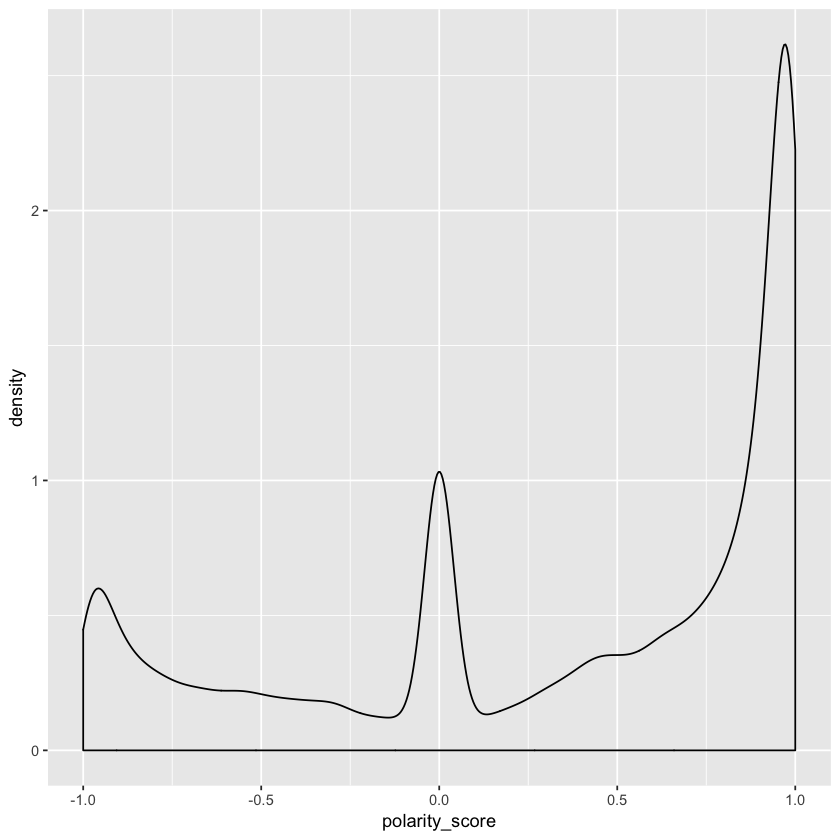

In [42]:
ggplot(blogdata, aes(polarity_score)) + geom_density()

Yeah, the numerical data is not normally distributed.

First, I'm going to make a bunch of models, each with a different combination of predictor variables (the demographic info). I will add in a random effect for ID # to account for variation between bloggers.Next I will compare across models using ANOVA to determine which one is the best. Lastly, I will investigate the models to determine whether the demographic info has any predictive power for polarity score at all.

In [45]:
lmer(polarity_score ~ 1 + (1 | id), data=blogdata, REML=F) -> blog.m0 

In [44]:
lmer(polarity_score ~ gender + (1 | id), data=blogdata, REML=F) -> blog.m1
lmer(polarity_score ~ gender + industry + (1 | id), data=blogdata, REML=F) -> blog.m2
lmer(polarity_score ~ gender + industry + age  + (1 | id), data=blogdata, REML=F) -> blog.m3
# let's through in astrological sign for fun
lmer(polarity_score ~ gender + industry + age + sign  + (1 | id), data=blogdata, REML=F) -> blog.m4

In [46]:
anova(blog.m0,blog.m1,blog.m2,blog.m3,blog.m4)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
blog.m0,3,1346564,1346598,-673278.8,1346558,NA,NA,NA
blog.m1,4,1346447,1346493,-673219.4,1346439,118.78991,1,1.164307e-27
blog.m2,43,1346369,1346861,-673141.5,1346283,155.76325,39,6.929947e-16
blog.m3,44,1346348,1346851,-673130.2,1346260,22.64599,1,1.947667e-06
blog.m4,55,1346352,1346981,-673121.2,1346242,18.08041,11,7.973344e-02


The best model for the data is the model with the highest log likelihood (`logLik`). The model with all 4 demographic variables (including astrological sign) is actually the best! However! The log likelihood is like -673k for all of them, which I think is very bad. Let's look into model 4.

In [48]:
print(summary(blog.m4), correlation=TRUE)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: polarity_score ~ gender + industry + age + sign + (1 | id)
   Data: blogdata

      AIC       BIC    logLik  deviance  df.resid 
1346352.3 1346981.1 -673121.2 1346242.3    681229 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8954 -0.6593  0.3627  0.7740  2.5303 

Random effects:
 Groups   Name        Variance Std.Dev.
 id       (Intercept) 0.05324  0.2307  
 Residual             0.40914  0.6396  
Number of obs: 681284, groups:  id, 19320

Fixed effects:
                                  Estimate Std. Error t value
(Intercept)                      0.4247153  0.0325458  13.050
gendermale                      -0.0498910  0.0044785 -11.140
industryAdvertising             -0.0626645  0.0397501  -1.576
industryAgriculture             -0.0661496  0.0574912  -1.151
industryArchitecture            -0.0269109  0.0471461  -0.571
industryArts                    -0.0743483  0.0325172  -2.286
industryAutomotive    


Correlation of fixed effects could have been required in summary()



Correlation of Fixed Effects:
            (Intr) gndrml indstryAd indstryAg indstryArc indstryArt indstryAt
gendermale  -0.048                                                           
indstryAdvr -0.717 -0.028                                                    
indstryAgrc -0.502 -0.011  0.409                                             
indstryArch -0.606 -0.022  0.499     0.345                                   
indstryArts -0.882 -0.019  0.723     0.500     0.609                         
indstryAtmt -0.526 -0.035  0.434     0.299     0.366      0.529              
indstryBnkn -0.671 -0.031  0.553     0.382     0.466      0.676      0.405   
indstryBtch -0.584 -0.031  0.475     0.329     0.401      0.581      0.349   
indstryBsnS -0.732 -0.025  0.602     0.416     0.508      0.736      0.441   
indstryChmc -0.601 -0.032  0.488     0.338     0.411      0.597      0.358   
indstryCm-M -0.853 -0.038  0.703     0.486     0.593      0.859      0.516   
indstryCnst -0.547 -0.023  0.455 

It told me it wouldn't print the correlation table unless I told it to, which I did, and it is very long. It appears that some of the coefficients (the demographic predictors) are correlated with each other, which I might be able to account for using interactions, but it's hard to tell because there are so many of them.

# Conclusions
The actual sentiment analysis part of my project was not super conclusive. But I learned a lot about how sentiment analysis works and started figuring out how to analyze my own data. I don't know if I will have the most cohesive project presentation, but I'm happy with the different paths I explored.